### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [562]:
data = pd.read_csv('data/coupons.csv')

In [564]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [569]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [572]:
#Since car column is mostly null, this will not help much in our analysis - Drop car column
data.drop(columns = 'car', inplace=True)
# Drop other na columns
data.dropna(inplace=True)
data['Y'] = data['Y'].replace({1: 'yes', 0: 'no'})

In [574]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [577]:
print(f"Total Count : {data.shape[0]}")
print(f"Users Accepted Coupon : {data[data.Y=='yes'].shape[0]}")
print(f"% of Users Accepted Coupon : {data[data.Y=='yes'].shape[0] / data.shape[0] * 100}%")

Total Count : 12079
Users Accepted Coupon : 6877
% of Users Accepted Coupon : 56.93352098683666%


<Axes: xlabel='Y', ylabel='count'>

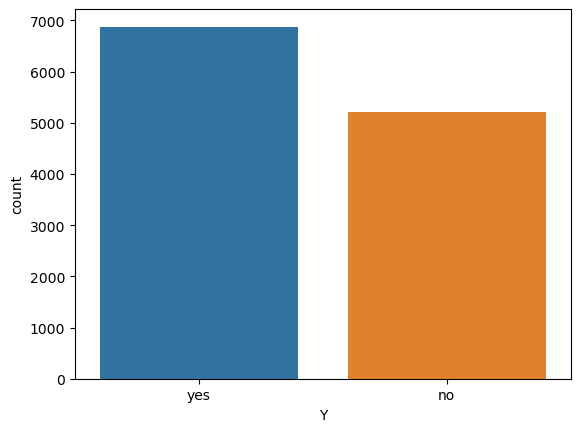

In [579]:
sns.countplot(data, x="Y")

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='count'>

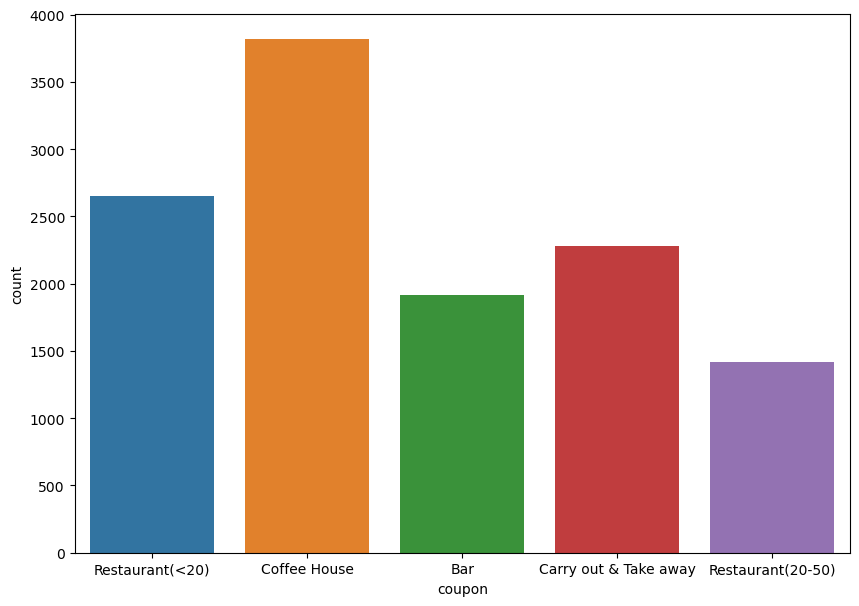

In [582]:
fig = plt.figure(figsize =(10, 7))
sns.countplot(data,x="coupon")
# plt.xticks(rotation=-45)

6. Use a histogram to visualize the temperature column.

In [585]:
data["temperature"].unique()

array([55, 80, 30])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

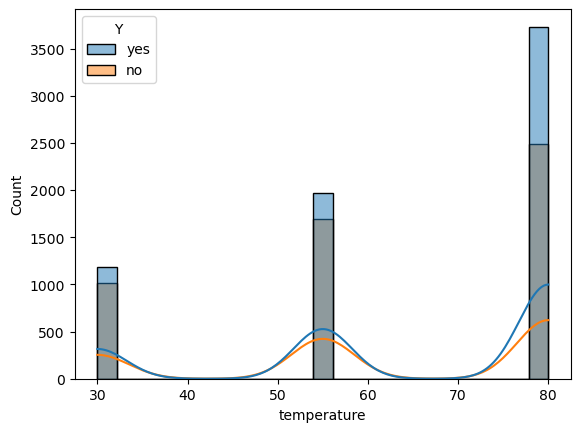

In [587]:
sns.histplot(data=data, x="temperature",hue="Y", kde=True)

In [723]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [594]:
df_bar = data.query("coupon == 'Bar'")
pd.options.display.max_columns = None

2. What proportion of bar coupons were accepted?


In [597]:
print(f"Total Count of Bar Coupons: {df_bar.shape[0]}")
print(f"Users Accepted Bar Coupons : {df_bar[df_bar.Y=='yes'].shape[0]}")
print(f"% of Bar Coupons Accepted : {round(df_bar[df_bar.Y=='yes'].shape[0] / df_bar.shape[0] * 100,2)}%")

Total Count of Bar Coupons: 1913
Users Accepted Bar Coupons : 788
% of Bar Coupons Accepted : 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [600]:
df_bar["Bar"].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [602]:
df_bar["3_times_bar"] = df_bar['Bar'].replace({
    'never': 'less_or_equal_3',
    'less1': 'less_or_equal_3',
    '1~3': 'less_or_equal_3',
    '4~8': 'greater_3',
    'gt8': 'greater_3'
})
df_bar.head()

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/3418142875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["3_times_bar"] = df_bar['Bar'].replace({


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,3_times_bar
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,yes,less_or_equal_3
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,yes,less_or_equal_3
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,yes,less_or_equal_3
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,no,less_or_equal_3
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,no,less_or_equal_3


Text(0, 0.5, '')

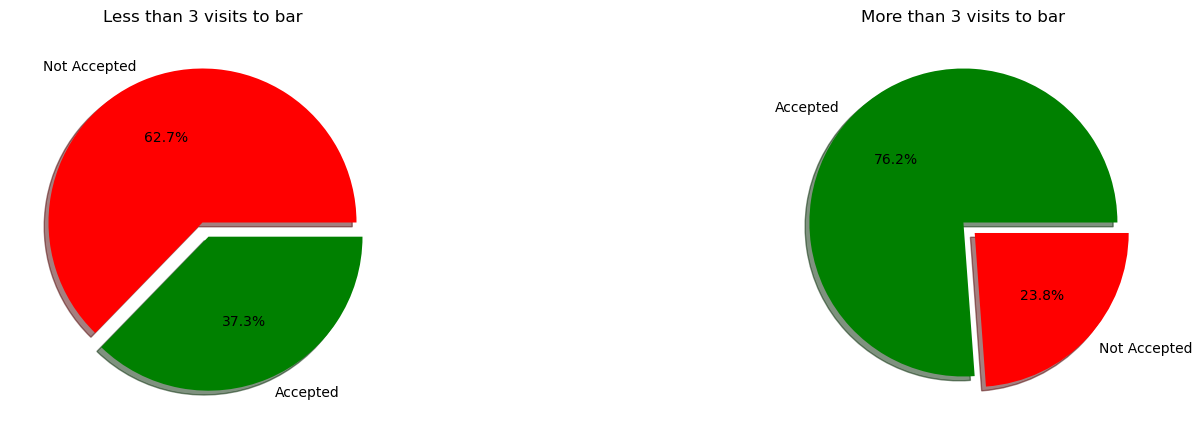

In [1034]:
# print(f"Total Count of Bar Coupons: {df_bar.shape[0]}")
# print(f"Who went to bar less than 3 times and Accepted Coupon : {df_bar[df_bar['3_times_bar']=='less_or_equal_3']['Y'].value_counts()['yes']}")
# print(f"Who went to bar more than 3 times and Accepted Coupon : {df_bar[df_bar['3_times_bar']=='greater_3']['Y'].value_counts()['yes']}")
# print(f"% of Bar Coupons Accepted who went less than 3 times : {round(df_bar[df_bar['3_times_bar']=='less_or_equal_3']['Y'].value_counts()['yes'] / df_bar[df_bar['3_times_bar']=='less_or_equal_3']['Y'].count() * 100,2)}%")
# print(f"% of Bar Coupons Accepted who went more than 3 times : {round(df_bar[df_bar['3_times_bar']=='greater_3']['Y'].value_counts()['yes'] / df_bar[df_bar['3_times_bar']=='greater_3']['Y'].count() * 100,2)}%")

colors=['red', 'green']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_bar[df_bar['3_times_bar']=='less_or_equal_3']['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Less than 3 visits to bar")
ax[0].set_ylabel("")
colors=['green', 'red']
df_bar[df_bar['3_times_bar']=='greater_3']['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="More than 3 visits to bar")
ax[1].set_ylabel("")




### @Findings - As per the above analysis the the visualization the acceptance rate between the bar users is "HIGH" with the users who went to the bar more than 3 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [608]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [610]:
#Function with the conditions - so that the dataframe is added with one more column having o or 1 as per the conditions met
def bar_age_condition(s):
    if s['Bar'] in ['1~3','4~8','gt8'] and s['age'] in ['26', '31', '36', '41', '46', '50plus']:
        return 1
    else:
        return 0

df_bar["bar_age_frequency"] = df_bar.apply(bar_age_condition,axis=1)


/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/3089262716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["bar_age_frequency"] = df_bar.apply(bar_age_condition,axis=1)


In [612]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,yes
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,yes
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,no
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no


Text(0, 0.5, '')

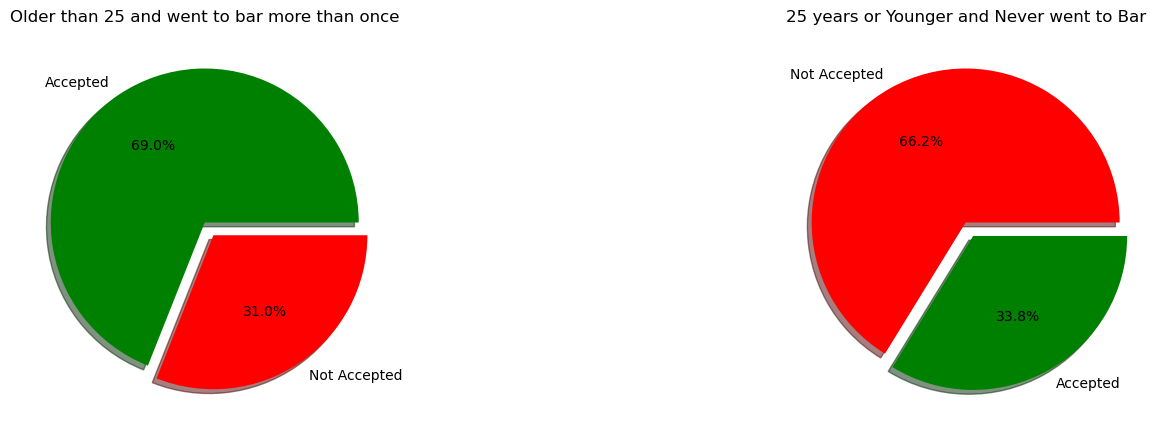

In [825]:
# print(f"Total Count of Bar Coupons: {df_bar.shape[0]}")
# print(f"Who went more than once and greater than age 25 and Accepted Coupon : {df_bar[df_bar['bar_age_frequency']==1]['Y'].value_counts()['yes']}")
# print(f"Who never went and below 25 years and Accepted Coupon : {df_bar[df_bar['bar_age_frequency']==0]['Y'].value_counts()['yes']}")
# print(f"% of Bar Coupons Accepted who went more than once and greater than 25 years : {round(df_bar[df_bar['bar_age_frequency']==1]['Y'].value_counts()['yes'] / df_bar[df_bar['bar_age_frequency']==1]['Y'].count() * 100,2)}%")
# print(f"% of Bar Coupons Accepted who never went and below 25 years : {round(df_bar[df_bar['bar_age_frequency']==0]['Y'].value_counts()['yes'] / df_bar[df_bar['bar_age_frequency']==0]['Y'].count() * 100,2)}%")

colors=['green', 'red']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_bar[df_bar['bar_age_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="Older than 25 and went to bar more than once")
ax[0].set_ylabel("")
colors=['red', 'green']
df_bar[df_bar['bar_age_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="25 years or Younger and Never went to Bar")

ax[1].set_ylabel("")


### The above analysis and visualization shows that more than 25 years old and have visited the bar more than once users have a higheracceptance rate than the users who are less than 25 years and never visited bar

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [618]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [638]:
#Function with the conditions - so that the dataframe is added with one more column having o or 1 as per the conditions met
def bar_job_passanger_condition(s):
    if s['Bar'] in ['1~3','4~8','gt8'] and s['occupation'] \
        not in ['Farming Fishing & Forestry'] and s['passanger'] not in ['Kid(s)','Alone']:
        return 1
    else:
        return 0

df_bar["bar_job_passanger_frequency"] = df_bar.apply(bar_job_passanger_condition,axis=1)

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/3524281541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["bar_job_passanger_frequency"] = df_bar.apply(bar_job_passanger_condition,axis=1)


In [640]:
#Checking Unique values
df_bar["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [646]:
#Dataframe sample after adding the column with the applied conditions
df_bar[['Bar','age','occupation','passanger','bar_job_passanger_frequency']].sample(10)

,Bar,age,occupation,passanger,bar_job_passanger_frequency
9280,less1,26,Healthcare Support,Alone,0
5435,never,50plus,Unemployed,Alone,0
10136,never,26,Office & Administrative Support,Alone,0
1694,never,46,Management,Alone,0
426,never,50plus,Personal Care & Service,Alone,0
12132,never,21,Unemployed,Friend(s),0
12110,less1,36,Unemployed,Friend(s),0
6102,1~3,21,Food Preparation & Serving Related,Partner,1
1181,1~3,26,Computer & Mathematical,Kid(s),0
7197,never,50plus,Arts Design Entertainment Sports & Media,Kid(s),0


Text(0, 0.5, '')

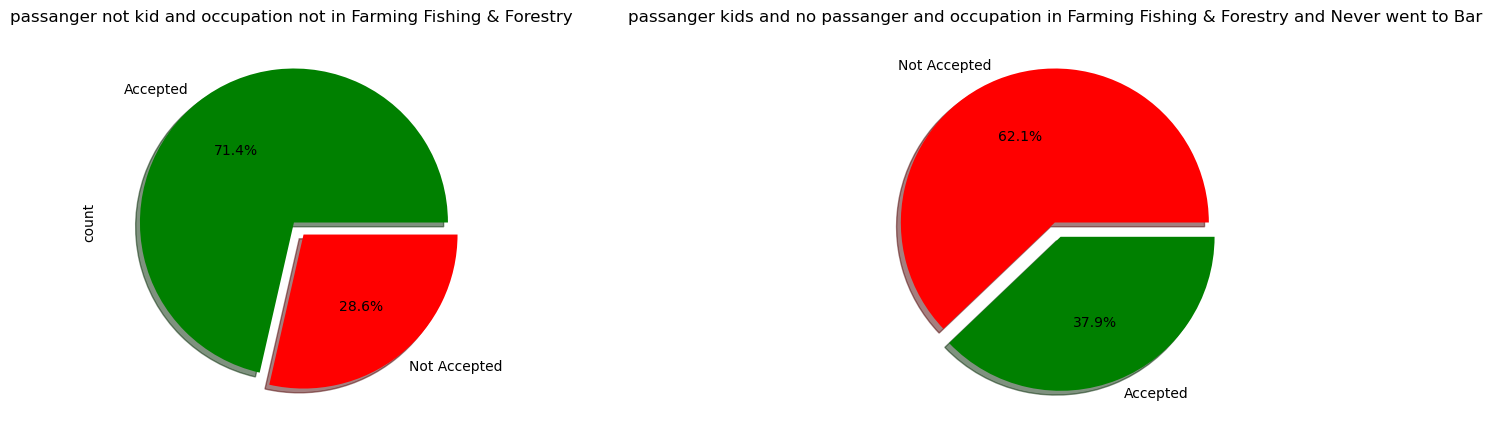

In [821]:
# print(f"Total Count of Bar Coupons: {df_bar.shape[0]}")
# print(f"Who went more than once and passanger not kid and occupation not in Farming Fishing & Forestry : {df_bar[df_bar['bar_job_passanger_frequency']==1]['Y'].value_counts()['yes']}")
# print(f"Who never went and had passanger kids and no passanger and occupation in Farming Fishing & Forestry : {df_bar[df_bar['bar_job_passanger_frequency']==0]['Y'].value_counts()['yes']}")
# print(f"% of Bar Coupons Accepted who went more than once and passanger not kid and occupation not in Farming Fishing & Forestry : {round(df_bar[df_bar['bar_job_passanger_frequency']==1]['Y'].value_counts()['yes'] / df_bar[df_bar['bar_job_passanger_frequency']==1]['Y'].count() * 100,2)}%")
# print(f"% of Bar Coupons Accepted who never went and had passanger kids and no passanger and occupation in Farming Fishing & Forestry : {round(df_bar[df_bar['bar_job_passanger_frequency']==0]['Y'].value_counts()['yes'] / df_bar[df_bar['bar_job_passanger_frequency']==0]['Y'].count() * 100,2)}%")

colors=['green', 'red']

fig, ax = plt.subplots(1, 2, figsize=(18,5))
ax[0].set_ylabel("")
df_bar[df_bar['bar_job_passanger_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="passanger not kid and occupation not in Farming Fishing & Forestry ")
colors=['red', 'green']
df_bar[df_bar['bar_job_passanger_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="passanger kids and no passanger and occupation in Farming Fishing & Forestry and Never went to Bar")
ax[1].set_ylabel("")



### @Findings The acceptance rate is "HIGH" for drivers with passengers with no kid and not in "Farming Fishing & Forestry"

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [652]:
#Checking unique values for the Marital Status field
df_bar['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [795]:
#Function with the conditions - so that the dataframe is added with one more column having o or 1 as per the conditions met
def bar_passanger_marital_condition(s):
    if s['Bar'] in ['1~3','4~8','gt8'] and s['maritalStatus'] \
        not in ['Widowed'] and s['passanger'] not in ['Kid(s)','Alone']:
        return 1
    else:
        return 0

df_bar["bar_passanger_marital_frequency"] = df_bar.apply(bar_passanger_marital_condition,axis=1)

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/2069902164.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["bar_passanger_marital_frequency"] = df_bar.apply(bar_passanger_marital_condition,axis=1)


Text(0, 0.5, '')

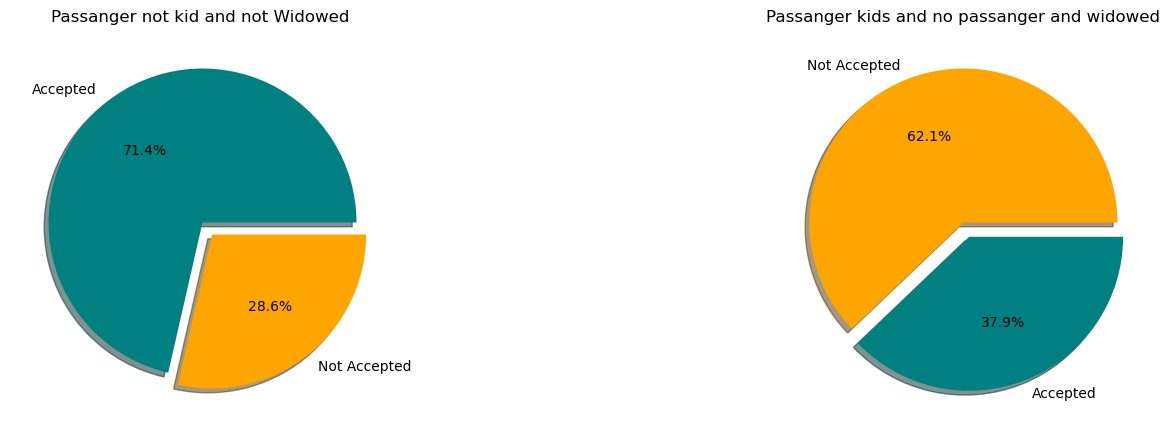

In [843]:
colors=['teal', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_bar[df_bar['bar_passanger_marital_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="Passanger not kid and not Widowed ")
ax[0].set_ylabel("")
colors=['orange', 'teal']
df_bar[df_bar['bar_passanger_marital_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Passanger kids and no passanger and widowed")
ax[1].set_ylabel("")


### The driver with passenger who is not a kid and whose marital status is not Widowed seems to have higher acceptance rating for the bar coupons

In [829]:
#Function with the conditions - so that the dataframe is added with one more column having o or 1 as per the conditions met
def bar_age_below_30_condition(s):
    if s['Bar'] in ['1~3','4~8','gt8'] and s['age'] in ['21','below21','26']:
        return 1
    else:
        return 0

df_bar["bar_age_below_30_frequency"] = df_bar.apply(bar_age_below_30_condition,axis=1)


/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/1071837930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["bar_age_below_30_frequency"] = df_bar.apply(bar_age_below_30_condition,axis=1)


Text(0, 0.5, '')

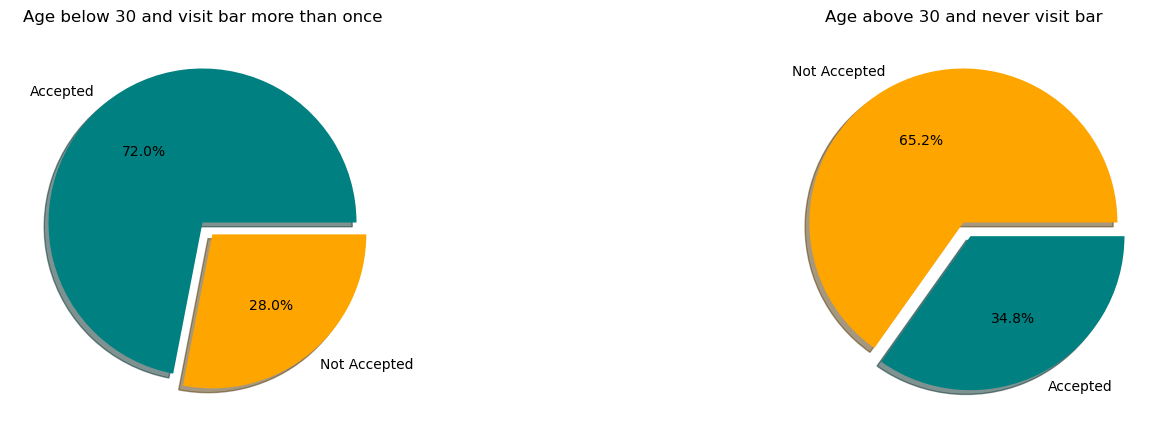

In [831]:
colors=['teal', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_bar[df_bar['bar_age_below_30_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="Age below 30 and visit bar more than once")
ax[0].set_ylabel("")
colors=['orange', 'teal']
df_bar[df_bar['bar_age_below_30_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Age above 30 and never visit bar")
ax[1].set_ylabel("")

### The driver whose age is below 30 and visits bar more than once have the higher acceptance rating for the bar coupons than the drivers who are above 30 and never visit bar

In [670]:
#Checking unique values for cheap restaurant
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [672]:
#Check values for income
data['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [835]:
#Function with the conditions - so that the dataframe is added with one more column having o or 1 as per the conditions met
def bar_cheap_restaurant_income_condition(s):
    if s['RestaurantLessThan20'] in ['4~8','gt8'] and s['income'] in ['$12500 - $24999','$37500 - $49999', '$25000 - $37499','Less than $12500']:
        return 1
    else:
        return 0

df_bar["bar_cheap_restaurant_income_frequency"] = df_bar.apply(bar_cheap_restaurant_income_condition,axis=1)

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/3321965023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar["bar_cheap_restaurant_income_frequency"] = df_bar.apply(bar_cheap_restaurant_income_condition,axis=1)


Text(0, 0.5, '')

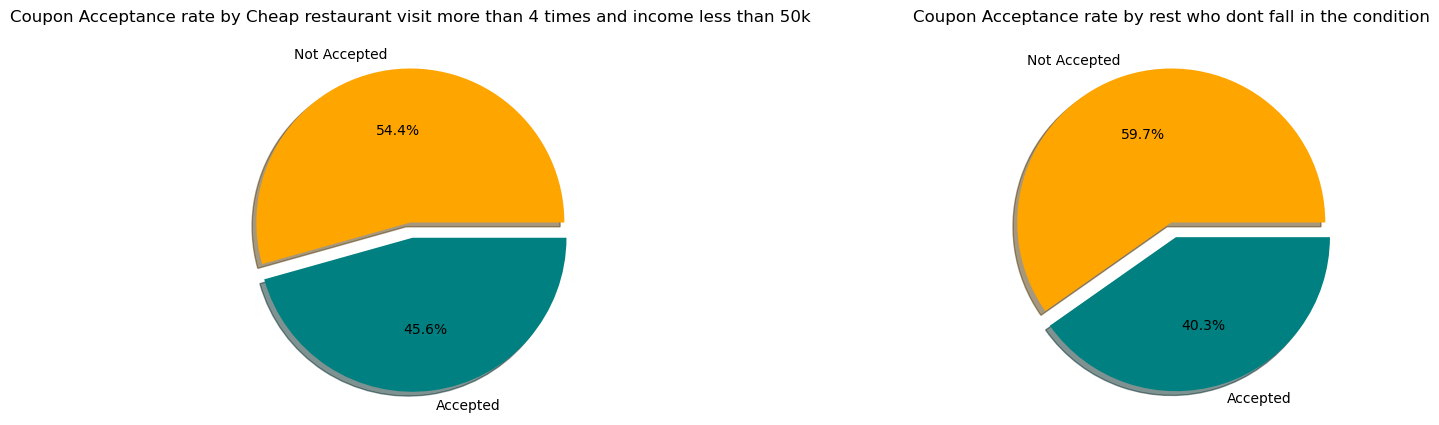

In [855]:
colors=['orange', 'teal']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_bar[df_bar['bar_cheap_restaurant_income_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Coupon Acceptance rate by Cheap restaurant visit more than 4 times and income less than 50k")
ax[0].set_ylabel("")
colors=['orange', 'teal']
df_bar[df_bar['bar_cheap_restaurant_income_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Coupon Acceptance rate by rest who dont fall in the condition")
ax[1].set_ylabel("")

### Here by looking at the above visualization the drivers who visits cheap restaurants more and have lesser income seems to have a slightly higher chance of the accepting the coupon

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings on the drivers on Bar coupons
1. Drivers who are frequent visitors to the bar, the acceptance rate of bar coupons is high among them
2. Drivers who are older than 25 have higher acceptance rate
3. The drivers with passengers but not kids or alone also have high acceptance rate for the coupon
4. Age below 30 and visits bar more than once, have a acceptance rate of 72% of bar coupons

Overall the bar coupon acceptance rate is nominally higher, across the drivers with age, passenger and occupation


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [910]:
df_coffee = data.query("coupon == 'Coffee House'")

In [912]:
df_coffee.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,no
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,no
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
32,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
34,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
37,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,no
38,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,no
43,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,no


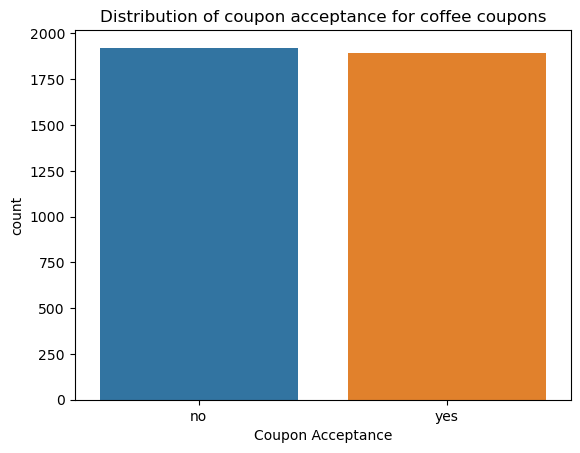

In [914]:
sns.countplot(data=df_coffee, x='Y')
plt.title("Distribution of coupon acceptance for coffee coupons")
plt.xlabel("Coupon Acceptance")
plt.show()

### From the above bar plot, the coffee coupon seems to be equally accepted and not accepted

In [917]:
# Lets check the proportion
print(f"Total Coffe Coupon : {df_coffee.shape[0]}")
print(f"Users Accepted Coupon : {df_coffee[df_coffee.Y=='yes'].shape[0]}")
print(f"% of Users Accepted Coupon : {round(df_coffee[df_coffee.Y=='yes'].shape[0] / df_coffee.shape[0] * 100,2)}%")


Total Coffe Coupon : 3816
Users Accepted Coupon : 1894
% of Users Accepted Coupon : 49.63%


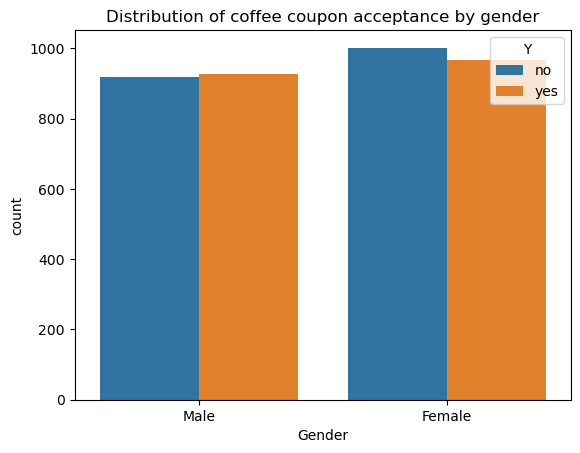

In [919]:
sns.countplot(data=df_coffee, x="gender",hue="Y")
plt.title("Distribution of coffee coupon acceptance by gender")
plt.xlabel("Gender")
plt.show()

### Gender doesn't seem to have much impact on the acceptance of cofee coupons

In [922]:
#Function with the conditions - so that the dataframe is added with one more column having 0 or 1 as per the conditions met
def coffee_weather_condition(s):
    if s['weather'] in ['Rainy','Snowy'] :
        return 1
    else:
        return 0

df_coffee["coffee_weather_frequency"] = df_coffee.apply(coffee_weather_condition,axis=1)

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/1323729542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["coffee_weather_frequency"] = df_coffee.apply(coffee_weather_condition,axis=1)


In [906]:
df_coffee["weather"].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

Text(0, 0.5, '')

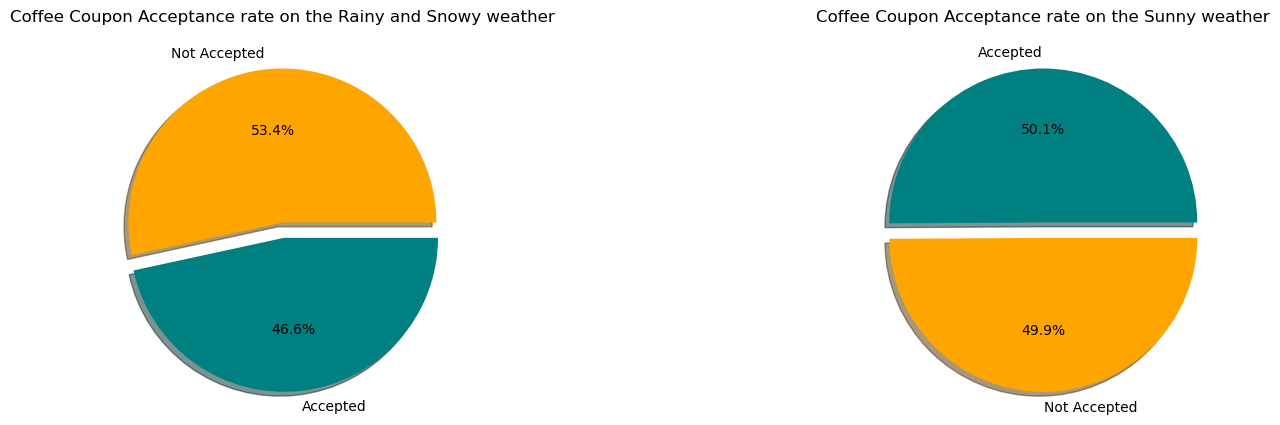

In [932]:
colors=['orange', 'teal']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_coffee[df_coffee['coffee_weather_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Coffee Coupon Acceptance rate on the Rainy and Snowy weather")
ax[0].set_ylabel("")
colors=['teal', 'orange']
df_coffee[df_coffee['coffee_weather_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Accepted","Not Accepted"], title="Coffee Coupon Acceptance rate on the Sunny weather")
ax[1].set_ylabel("")

### Surprisingly the weather doesn't seem to have much impact on the coffee house coupon acceptance rate

In [973]:
df_coffee['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [1021]:
#Function with the conditions - so that the dataframe is added with one more column having 0 or 1 as per the conditions met
def coffee_occupation_condition(s):
    if s['occupation'] in ['Student','Unemployed'] :
        return 1
    else:
        return 0

df_coffee["coffee_occupation_frequency"] = df_coffee.apply(coffee_occupation_condition,axis=1)

/var/folders/mq/2hlc7t3j1n70sc6bwnvg849r0000gn/T/ipykernel_62677/3663312036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["coffee_occupation_frequency"] = df_coffee.apply(coffee_occupation_condition,axis=1)


Text(0, 0.5, '')

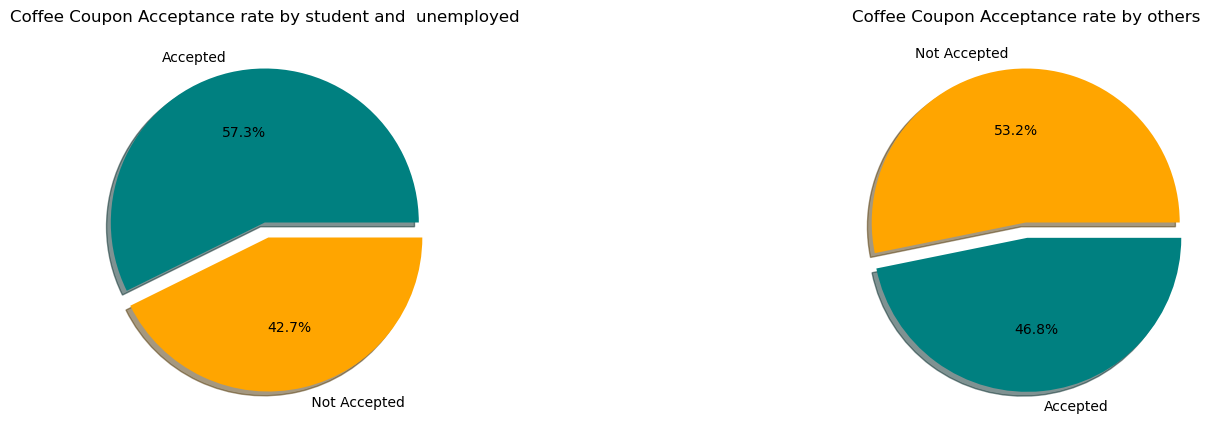

In [1029]:
colors=['teal', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(18,5))

df_coffee[df_coffee['coffee_occupation_frequency']==1]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=["Accepted"," Not Accepted"], title="Coffee Coupon Acceptance rate by student and  unemployed")
ax[0].set_ylabel("")
colors=['orange', 'teal']
df_coffee[df_coffee['coffee_occupation_frequency']==0]['Y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, colors=colors, labels=["Not Accepted","Accepted"], title="Coffee Coupon Acceptance rate by others")
ax[1].set_ylabel("")

### From the above visualization we can incur that the acceptance of coffee coupons are high by student and unemployed than the others